In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind # Numeric Vs categorical

In [18]:
df = pd.read_csv("/Users/vaibhav.srivastava/Downloads/yullu.csv")

In [19]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
df.shape

(10886, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
df.isnull().sum().sort_values(ascending = False)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [12]:
df.describe(include='object').T

,count,unique,top,freq
datetime,10886,10886,2011-01-01 00:00:00,1


In [20]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [21]:
#### 1. Working Day has effect on number of electric cycles rented
H0= On working day more number of electric cycles rented than that of holiday/weekend
Ha= On working day less number of electric cycles rented than that of holiday/weekend
h0= u1>=u2
ha=u1<u2

In [30]:
weekend=df[df['workingday']==0]['count'].sample(2000)
workingday=df[df['workingday']==1]['count'].sample(2000)

In [34]:
workingday.std()

181.27118587675358

In [33]:
weekend.std()

173.26647731191412

In [36]:
alpha=0.05
#lower tail test

In [37]:
test_stat,p_value=ttest_ind(weekend,workingday,equal_var=False,alternative='less')

In [38]:
p_value

0.6015044490487484

In [39]:
test_stat

0.2572603017537338

In [41]:
#Fail to reject the null h0 hypothesis
#On working day more number of electric cycles rented than that of holiday/weekend

In [42]:
#### 2. No. of cycles rented similar or different in different seasons


In [46]:
df["season"].unique()

array([1, 2, 3, 4])

<Axes: xlabel='season', ylabel='count'>

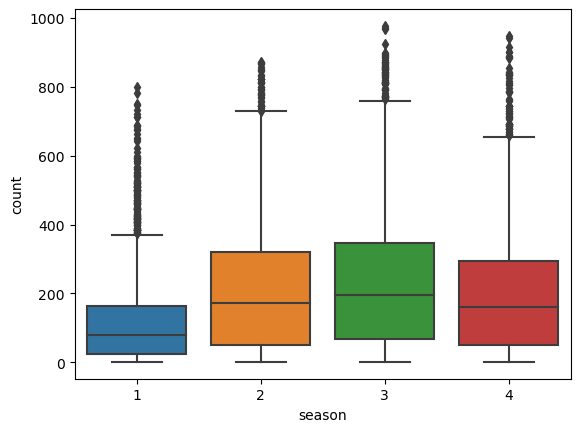

In [47]:
sns.boxplot(x='season', y='count',data=df)

In [48]:
# H0= there is no differnce btw count of above 4 seasons

<Axes: xlabel='count', ylabel='season'>

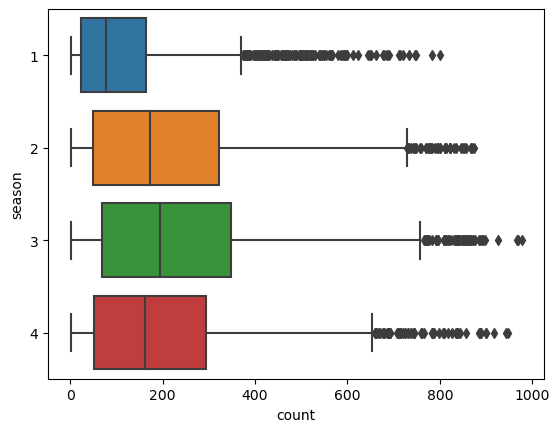

In [50]:
sns.boxplot(x='count', y='season',data=df,orient='h')

<Axes: xlabel='count', ylabel='Density'>

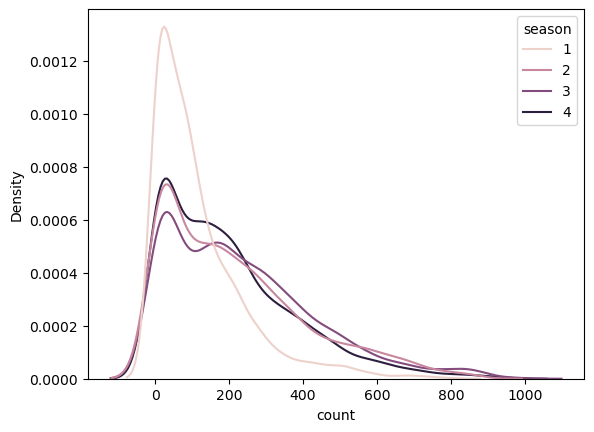

In [51]:
sns.kdeplot(x='count',data=df,hue='season')

In [52]:
alpha=0.05
# H0= there is no differnce btw count of above 4 seasons....all means are equal
# Ha= atleast one of the season mean is different


In [53]:
# Test stat - F ratio - variance btw groups and variance within group
# uder the assumption H0 is True - F ratio is lower
# F ration will be higher if we have significant differnce in means
# F ration follows F distribution - F high then P will be low and If F is low then P will be high
 


In [54]:
from scipy.stats import f_oneway

In [59]:
count_s1=df[df['season']==1]['count']
count_s2=df[df['season']==2]['count']
count_s3=df[df['season']==3]['count']
count_s4=df[df['season']==4]['count']

In [60]:
count_s1.mean()

116.34326135517499

In [61]:
## ANOVA for seasons : 

In [62]:
f_stat,p_value=f_oneway(count_s1,count_s2,count_s3,count_s4)
print("f_ratio : ", f_stat)

print("p_value : ", p_value)
if p_value<0.05:
    print("reject H0")
else:
    print("fail to reject H0")
    print("All season have same count")

f_ratio :  236.94671081032106
p_value :  6.164843386499654e-149
reject H0


In [ ]:
### Season and count are significantly related to each other.